# Hierarchical Clustering

## Preparación del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Lectura del dataset

Utilizamos un conjunto de datos del libro Bioestadística con R, que contiene información para nueve fuentes de proteínas diferentes y su consumo respectivo de varios países. Usaremos estos datos para agrupar países según su consumo de proteínas.

In [2]:
# Lectura del dataset
df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/glossary/main/data/protein.csv')
df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [10]:
# Separación de caracteristicas
X = df.iloc[:,1:10]
print(X.shape)
X.head()

(25, 9)


,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


## Uso del dendrograma para encontrar el número óptimo de clusters

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Función de vinculación para agrupar datos según similud
Z = linkage(X, method='ward', metric='euclidean')
Z[:5]

array([[ 5.        , 19.        ,  4.79583152,  2.        ],
       [ 3.        , 24.        ,  4.8754487 ,  2.        ],
       [11.        , 20.        ,  5.09705797,  2.        ],
       [ 2.        ,  8.        ,  6.00749532,  2.        ],
       [13.        , 23.        ,  6.52533524,  2.        ]])

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

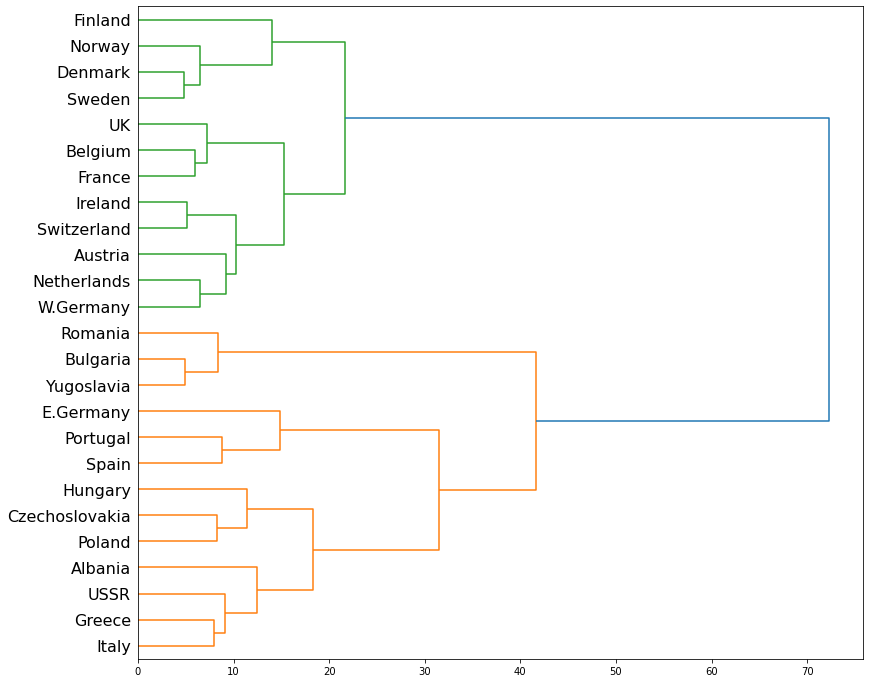

In [7]:
# Dibujo del dendograma
labelList = list(df['Country'])

plt.figure(figsize=(13, 12))
dendrogram(
    Z,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()

## Entrenamiento del modelo de agrupación jerárquica en el conjunto de datos

In [9]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X)

print(hc.labels_)

[0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0]


## Incorporando los clusters al dataframe original

In [11]:
df['cluster'] = y_hc
df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg,cluster
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,0
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,1
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,1
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,0
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,0
